In [7]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
import sys

CURRENT_DIR = Path('.').resolve()
MODULES_DIR = CURRENT_DIR.parent.joinpath('src')
sys.path.append(str(MODULES_DIR))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


-----

# Model building in Keras

## Importing data

In [19]:
import utils

In [9]:
X_test, y_test,X_train, y_train = utils.import_imdb_dataset()

17464789/17464789 [==============================] - 1s 0us/step


Let's do a quick check to see the amount of data we have:

In [10]:
print(f"Number of training samples = {X_train.shape[0]}")
print(f"Number of testing samples = {X_test.shape[0]}")

Number of training samples = 25000
Number of testing samples = 25000


## Zero padding


The movie reviews have different lengths, and therefore the input vectors have differents sizes. This is an issue, as neural networks only accept fixed-size vectors.

To address this issue, we are going to define a `maxlen` parameter. Reviews that are longer than `maxlen` will be truncated and reviews that are shorter than maxlen will be padded with zeros.

![zero padding](https://i.imgur.com/HVP3t99.png)

In [11]:
from keras.utils import pad_sequences

X_test_padded = pad_sequences(X_test, maxlen = 100)
X_train_padded = pad_sequences(X_train, maxlen = 100)

In [12]:
print(f"X_train_vector shape = {X_train_padded.shape}")
print(f"X_test_vector shape = {X_test_padded.shape}")

X_train_vector shape = (25000, 100)
X_test_vector shape = (25000, 100)


## Word embedding and LSTM layers

Let's define a new Sequential class

In [13]:
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Dense

In [14]:
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim= 128))
model.add(LSTM(units=128))
model.add(Dense(units=1, activation='sigmoid'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         1280000   
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,411,713
Trainable params: 1,411,713
Non-trainable params: 0
_________________________________________________________________


## Compiling and training models

- **Loss function** We use `binary_crossentropy`
- **Optimizer** Let's try the `SGD`, `RMSprop` and `adam` optimizer


-----
### SGD

In [15]:
Optimizer = 'SGD'
model.compile(loss='binary_crossentropy',
              optimizer = Optimizer,
              metrics=['accuracy'])

In [16]:
scores = model.fit(x=X_train_padded, y=y_train,
                   batch_size = 256, epochs=10,
                   validation_data=(X_test_padded, y_test),
                   shuffle=True)

Epoch 1/10
98/98 [==============================] - 21s 134ms/step - loss: 0.6931 - accuracy: 0.5039 - val_loss: 0.6932 - val_accuracy: 0.4976
Epoch 2/10
98/98 [==============================] - 9s 91ms/step - loss: 0.6930 - accuracy: 0.5085 - val_loss: 0.6931 - val_accuracy: 0.5018
Epoch 3/10
98/98 [==============================] - 5s 47ms/step - loss: 0.6930 - accuracy: 0.5127 - val_loss: 0.6931 - val_accuracy: 0.5033
Epoch 4/10
98/98 [==============================] - 5s 53ms/step - loss: 0.6929 - accuracy: 0.5096 - val_loss: 0.6930 - val_accuracy: 0.5080
Epoch 5/10
98/98 [==============================] - 4s 36ms/step - loss: 0.6929 - accuracy: 0.5142 - val_loss: 0.6930 - val_accuracy: 0.5081
Epoch 6/10
98/98 [==============================] - 3s 31ms/step - loss: 0.6929 - accuracy: 0.5150 - val_loss: 0.6930 - val_accuracy: 0.5100
Epoch 7/10
98/98 [==============================] - 3s 28ms/step - loss: 0.6928 - accuracy: 0.5185 - val_loss: 0.6929 - val_accuracy: 0.5135
Epoch 8/10


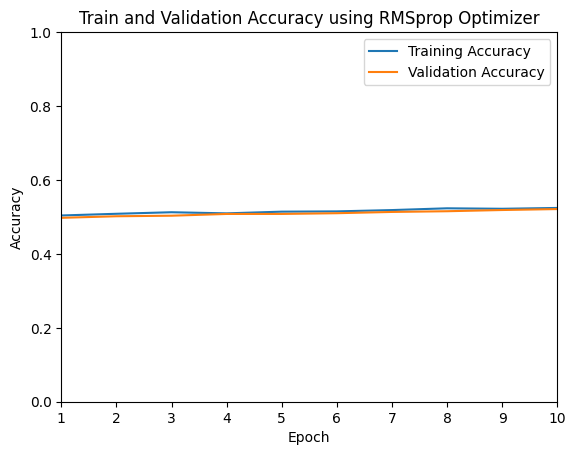

In [20]:
utils.plot_accuracy(scores)

In [21]:
y_test_predict = model.predict(X_test_padded)

782/782 [==============================] - 3s 3ms/step


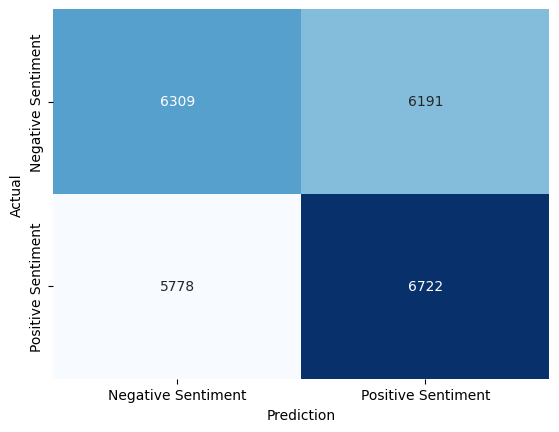

In [23]:
utils.plot_cm(y_test_predict,y_test)

-----
## RMSprop

In [24]:
rmsprop_score, rmsprop_model = utils.train_model(
    Optimizer='RMSprop',
    X_train=X_train_padded,
    y_train=y_train,
    X_val= X_test_padded,
    y_val=y_test
)

Epoch 1/10
196/196 [==============================] - 31s 143ms/step - loss: 0.5393 - accuracy: 0.7152 - val_loss: 0.3906 - val_accuracy: 0.8292
Epoch 2/10
196/196 [==============================] - 10s 52ms/step - loss: 0.3405 - accuracy: 0.8552 - val_loss: 0.3705 - val_accuracy: 0.8371
Epoch 3/10
196/196 [==============================] - 8s 41ms/step - loss: 0.2898 - accuracy: 0.8840 - val_loss: 0.4215 - val_accuracy: 0.8375
Epoch 4/10
196/196 [==============================] - 7s 35ms/step - loss: 0.2578 - accuracy: 0.8978 - val_loss: 0.3963 - val_accuracy: 0.8196
Epoch 5/10
196/196 [==============================] - 4s 22ms/step - loss: 0.2330 - accuracy: 0.9097 - val_loss: 0.3836 - val_accuracy: 0.8410
Epoch 6/10
196/196 [==============================] - 4s 22ms/step - loss: 0.2069 - accuracy: 0.9210 - val_loss: 0.5715 - val_accuracy: 0.8290
Epoch 7/10
196/196 [==============================] - 4s 20ms/step - loss: 0.1850 - accuracy: 0.9313 - val_loss: 0.5448 - val_accuracy: 0.8

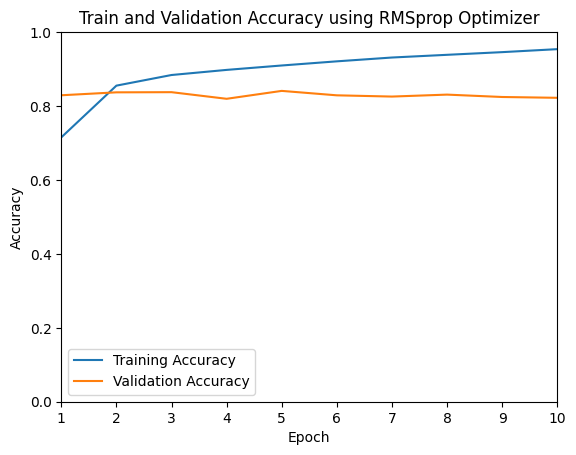

In [25]:
utils.plot_accuracy(rmsprop_score)

782/782 [==============================] - 3s 4ms/step


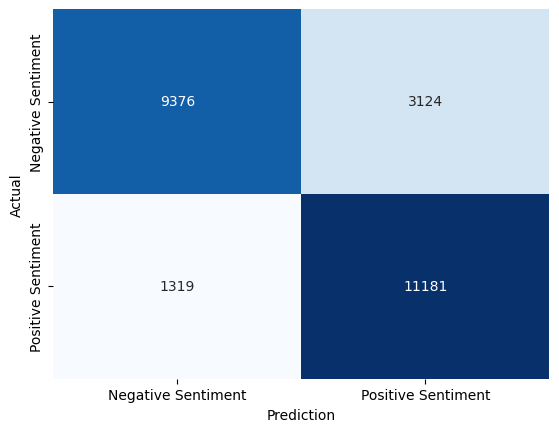

In [26]:
y_test_predict_rms = rmsprop_model.predict(X_test_padded)
utils.plot_cm(y_test_predict_rms,y_test)

-----
## Adam

In [27]:
adam_score, adam_model = utils.train_model(
    Optimizer='adam',
    X_train=X_train_padded,
    y_train=y_train,
    X_val= X_test_padded,
    y_val=y_test
)

Epoch 1/10
196/196 [==============================] - 36s 170ms/step - loss: 0.4512 - accuracy: 0.7734 - val_loss: 0.3632 - val_accuracy: 0.8408
Epoch 2/10
196/196 [==============================] - 15s 78ms/step - loss: 0.2608 - accuracy: 0.8933 - val_loss: 0.3832 - val_accuracy: 0.8402
Epoch 3/10
196/196 [==============================] - 11s 54ms/step - loss: 0.1913 - accuracy: 0.9280 - val_loss: 0.4033 - val_accuracy: 0.8425
Epoch 4/10
196/196 [==============================] - 6s 29ms/step - loss: 0.1414 - accuracy: 0.9481 - val_loss: 0.5663 - val_accuracy: 0.8286
Epoch 5/10
196/196 [==============================] - 6s 31ms/step - loss: 0.1070 - accuracy: 0.9616 - val_loss: 0.5329 - val_accuracy: 0.8288
Epoch 6/10
196/196 [==============================] - 6s 33ms/step - loss: 0.0807 - accuracy: 0.9730 - val_loss: 0.6401 - val_accuracy: 0.8247
Epoch 7/10
196/196 [==============================] - 5s 28ms/step - loss: 0.0651 - accuracy: 0.9784 - val_loss: 0.7551 - val_accuracy: 0.

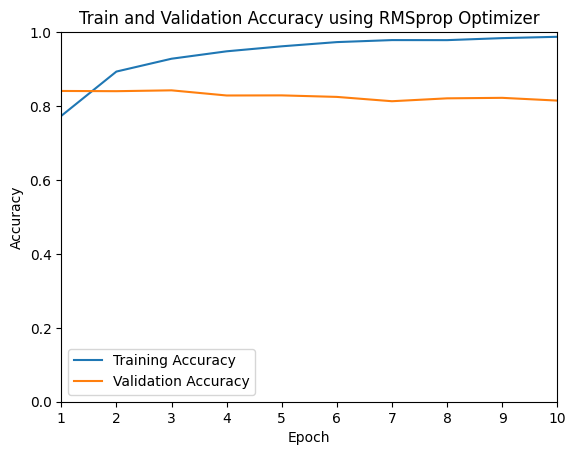

In [28]:
utils.plot_accuracy(adam_score)

782/782 [==============================] - 3s 3ms/step


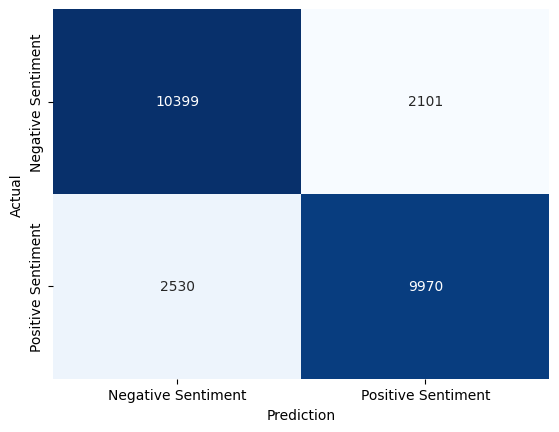

In [29]:
y_test_predict_adam = adam_model.predict(X_test_padded)
utils.plot_cm(y_test_predict_adam,y_test)

-----

# Results

Let's take a look at some of the wrongly classified samples, and see where the model got it wrong.

In [32]:
false_negatives = []
false_positives = []
for i in range(len(y_test_predict_rms)):
    if y_test_predict_rms[i][0] != y_test[i]:
        if y_test[i] == 0: # False Positive
            false_positives.append(i)
        else:
            false_negatives.append(i)

In [35]:
import random
id_to_word = utils.dic_words()

1641221/1641221 [==============================] - 0s 0us/step


Let's firts take a look at the false positive. As a reminder, false positive refer to movie reviews that were negative but that our model wrongly classified as positive.

In [54]:
' '.join(id_to_word.get(i, 'UNK') for i in X_test_padded[random.choice(false_positives)])

"a couple laughs here and there but over all fails to deliver what the first film accomplished these guys UNK friends were more obnoxious than likable except for seth he was kinda funny the only likable characters other than seth is ron and melinda everyone else just more or less gets on your nerves you wanna watch this film just watch girls gone wild it's the same thing only it doesn't try to pretend that it's a film stick to the original bachelor party that's the movie that's going to get you in tears of laughter br br 3 10"

In [58]:
' '.join(id_to_word.get(i, 'UNK') for i in X_test_padded[random.choice(false_positives)])

"brothers just because they take off their pants how creative i don't get why they need a tv show i mean most artist don't really need a tv show about themselves especially the naked brothers band heck how many of them are in the freaking group and seriously whats with the movie UNK nick use to be the UNK of my years growing up but seriously the naked brother band so many parents would not let their kids watch this especially with the name the naked brother's band its a stupid UNK show that should not be aired onto tv"

Let's take a look at some false negatives

In [59]:
' '.join(id_to_word.get(i, 'UNK') for i in X_test_padded[random.choice(false_negatives)])

"like one of those UNK where they always go to commercial at the most annoying times the richard character was completely creepy i've dated guys like that well not totally like that lol i wish UNK hadn't have gotten killed he was a UNK and very easy on the eyes i love these stalker type stories it always makes me get up and make sure my doors are locked my husband doesn't usually like these types of movies but actually sat through the entire thing with me and actually enjoyed it i can't wait to see what UNK does next"

In [60]:
' '.join(id_to_word.get(i, 'UNK') for i in X_test_padded[random.choice(false_negatives)])

'humble sarcastic servant a terrific screwball comedy it won the oscar for best song for UNK theme best that you can do it also won the golden globe it was number UNK on 100 years 100 songs and it was nominated best writing screenplay written directly for the screen it was nominated the UNK anthony UNK award for film music for burt UNK and it won the golden globe for best motion picture comedy musical sir john gielgud was number 35 on the 50 greatest british actors and the film was number UNK on 100 years 100 laughs very good'

-----

Statistically speaking, such reviews are relatively rare, and it is difficult for our model to learn the true sentiment of such reviews.